## <center> EL2810 Machine Learning Theory </center>
# <center> Laboratory 2 </center>

This laboratory contains two sets of exercises: *Preparatory Exercises* and *Main Tasks*. The Main Tasks will be graded during the Lab session. The Preparatory Exercises will not be graded, but you are strongly encouraged to do them **before the Lab**, since otherwise you might not have enough time to finish the main tasks during the Lab session.  

#### The following libraries need to be imported for the Lab

In [1]:
""" Do not change anything here """

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eigh
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
%matplotlib inline 

# A. Preparatory Exercises: Support Vector Machines with Kernels

In this exercise, we will develop an algorithm to compute a support vector machine (SVMs) using kernels.

In the lectures, we have seen the following formulation for a soft SVM for data $S = \{ (\boldsymbol{x}_i, y)\}_{i=1}^m$ is: 

\begin{align}
\min_{\boldsymbol{w}\in\mathbb{R}^d} \frac{1}{m} \sum_{i=1}^m h(y_i \langle \boldsymbol{w},\boldsymbol{x}_i \rangle) + \lambda \| \boldsymbol{w} \|_2^2,
\end{align}  
where $h(x) := \max\{ 0, 1 - x \}$ is the **hinge loss**, and $\lambda > 0$ is a regularization parameter. Our goal is to apply this technique to data which has been mapped into a feature space $\mathcal{F}$ (defined as a Hilbert space) via a **feature map** $\psi\colon \mathcal{X} \to \mathcal{F}$, *i.e.*, using data $\{(\psi(x_i), y_i)\}_{i=1}^m$ instead of $\{(x_i, y_i)\}_{i=1}^m$).

By defining a **kernel** $K\colon \mathcal{X}^2 \to \mathbb{R}$ as $K(x, y) = \langle \psi(x), \psi(y) \rangle$, and a **Gramian matrix** $\boldsymbol{G} \in \mathbb{R}^{m \times m}$ with entries $G_{ij} = K(x_i, x_j) = \langle \psi(x_i), \psi(x_j) \rangle$, we have seen that by the representation theorem the soft SVM can be written as  

\begin{align}
\min_{\boldsymbol{\alpha} \in \mathbb{R}^m} \frac{1}{m} \sum_{i=1}^m \max\{ 0, 1 - y_i \boldsymbol{\alpha}^T \boldsymbol{G} \boldsymbol{e}_i\} + \lambda \boldsymbol{\alpha}^T \boldsymbol{G} \boldsymbol{\alpha},
\end{align}  

where $\boldsymbol{e}_i = [0, \dots, 0, 1, 0, \dots, 0]^T$ (with the $1$ in the $i$-th position), and the SVM predictor $h\colon \mathcal{X} \to \{-1, 1\}$ is given by  

\begin{align}
h(x) = \text{sgn}\left(\left\langle \sum_{i=1}^m \alpha_i \psi(x_i), \psi(x) \right\rangle\right) = \text{sgn}\left(\sum_{i=1}^m \alpha_i K(x_i,x) \right).
\end{align}  

**Note:** Unfortunately we are using the same letter, *h*, for the hinge loss and the SVM predictor. Which one we refer to, however, should be clear from the context.

## A.1. An SGD algorithm for soft-SVMs with kernels

A.1.1. *Is the soft-SVM cost function $f(\boldsymbol{\alpha}) = \frac{1}{m} \sum_{i=1}^m \max\{ 0, 1 - y_i \boldsymbol{\alpha}^T \boldsymbol{G} \boldsymbol{e}_i\} + \lambda \boldsymbol{\alpha}^T \boldsymbol{G} \boldsymbol{\alpha}$ convex?*

$$\frac{\partial f}{\partial \boldsymbol{\alpha}} = 2\lambda  \boldsymbol{G}\boldsymbol{\alpha} - \frac{1}{m} \sum_{i=1}^{m} \begin{cases} 0 & \text{if } 1 - y_i  \boldsymbol{\alpha}^T\boldsymbol{G} \boldsymbol{e}_i\ > 1 \\ y_i  \boldsymbol{G} \boldsymbol{e}_i & \text{otherwise} \end{cases}$$

In [ ]:
## ENTER YOUR ANSWER HERE ##
# Yes, because the hinge loss function and the regularization term are both convex.
# compute f partial derivative with respect to alpha to get the optimal alpha

A.1.2. *Assume that $\| \boldsymbol{\alpha}\|_2 \leq W$. Is $f$ from Exercise A.1.1 Lipschitz? If yes, determine a suitable Lipschitz constant for $f$.*

In [ ]:
## ENTER YOUR ANSWER HERE ##
# Yes. From the partial derivative of f, we can bould the partial derivative by the following L

$$L = 2\lambda  \boldsymbol{G}W + \max_{i} \| \boldsymbol{G}_{i}\|_2 $$
where $G_i$ is column vector of $G$

A.1.3. *Derive a sub-gradient for $f$ in Exercise A.1.1.*

In [ ]:
## ENTER YOUR ANSWER HERE ##

$$v = 2\lambda  \boldsymbol{G}\boldsymbol{\alpha} - \frac{1}{m} \sum_{i=1}^{m} \begin{cases} 0 & \text{if } 1 - y_i  \boldsymbol{\alpha}^T\boldsymbol{G} \boldsymbol{e}_i\ > 1 \\ y_i  \boldsymbol{G} \boldsymbol{e}_i & \text{otherwise} \end{cases}$$

A.1.4. *Construct a stochastic gradient descent (SGD) algorithm to compute the minimizer $\boldsymbol{\alpha}^\ast$ of the soft-SVM cost function, as in the slides of Part 8. Write your algorithm by completing the Python code below.*

In [2]:
def soft_SVM(G, y, lam, eta, T):
    # G:   Gramian matrix
    # y:   vector of labels
    # lam: regularization parameter
    # eta: step size
    # T:   total number of iterations
    
    m     = y.size## FILL IN ##   # Number of samples
    alpha = np.zeros((m, T))## FILL IN ##   # Initialize matrix of values of alpha
    # alpha[:, 0] = np.random.rand(m)
    for t in range(T-1):
        # Choose a sample i at random
        ## FILL IN ##
        ind = np.random.randint(m)
        yi = y[ind]
        # Gi = G[random_ind, :]
        # Compute sub-gradient 'v'
        ## FILL IN ##
        v = 0
        prod = np.dot(G[ind,:], alpha[:,t])
        if prod.all() > 1:
            f = 0
            # v = 2 * lam * G @ alpha[:, t]
            
        else:
            f = 1
        # how v are computed?
        v = 2 * lam * np.dot(G[ind, :], alpha[:, t]) - f * yi * G[:, ind]
        # Update alpha
        alpha[:,t+1] = alpha[:, t] - eta * v## FILL IN ##

    # Return average alpha
    return np.mean(alpha, axis = 1)## FILL IN ##

**Note:** The algorithm for learning SVMs based on sub-gradient descent is not state-of-the-art, but is simple enough for analysis. The algorithm presented in Sec. 15.5 of Shalev-Shwartz&Ben-David's book is superior, as it relies on strong-convexity of the SVM cost function, instead of its Lipschitz continuity (so it leads to a faster convergence rate, valid for all values of $\boldsymbol{\alpha}$, not just for $\| \boldsymbol{\alpha}\|_2 \leq W$).

A.1.5. *Test your implementation on the following toy example:*

In [3]:
""" Do not change anything here """

X = np.array([[1,1],[1,-1],[-1,-1],[-1,1]])
y = np.array([[1],[1],[-1],[-1]])

*and where $\psi(\boldsymbol{x}) = \boldsymbol{x}$, which yields the Gramian matrix*

In [4]:
""" Do not change anything here """

G = X@X.T

*The weight vector can be computed as follows: (why?)*

In [10]:
""" Do not change anything here """
# np.random.seed(42)
alpha = soft_SVM(G, y, 0.01, 0.001, 100000)
w = X.T@alpha
print(w)
# for i in range(10):
#     alpha = soft_SVM(G, y, 0.01, 0.001, 100000)
#     w = X.T@alpha
#     print(w)

[199.998        0.40581616]


*Does the result agree with what you expect for this toy example? (***Hint:*** Draw a picture with the examples and the classification boundary)*

In [ ]:
## ENTER YOUR ANSWER HERE ##
# Yes. But if alpha are initialized randomly, the results will change and be not consistent.

## A.2. Different penalties for false positive/negative errors

In the soft-SVM formulation, errors when misclassifying positive or negative points are treated in the same manner. Suppose, however, that we wish to penalize an error on a negative point (*i.e.*, a false positive error) $n > 0$ times more than an error on a positive point, where $n$ is an integer.

A.2.1. *How can you modify your code to achieve this?*

In [ ]:
## ENTER YOUR ANSWER HERE ##
'''
if 1 - yi * tmp[random_ind] > 1:
    v = 2 * lam * G @ alpha[:, t]
else:
    if yi == -1:
        v = 2 * lam * G @ alpha[:, t] - n * yi * G[:, random_ind]
    else:
        v = 2 * lam * G @ alpha[:, t] - yi * G[:, random_ind]
'''

**Tip**: Consider modifying the input data.

  
# B. Main Tasks

## B.1. Kernel SVMs for breast cancer diagnosis

In this task, we will use the SVM algorithm developed in the Preparatory Exercises to implement a classifier that can diagnose the presence of breast cancer tumors based on a series of processed features. For this, we will use a simplified version of a real dataset from the UCI Machine Learning Repository, available at

https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

We will use the file 'breast-cancer_scale.csv' available in the Canvas page.

We first load the dataset, which consists of 683 samples and 10 features:

In [6]:
""" Do not change anything here """

data = np.genfromtxt('./data/breast-cancer_scale.csv', delimiter='\t')


Next, we need to standardize its features, *i.e.*, apply a linear transformation to each feature so that their sample average is zero and sample variance is one:

In [7]:
""" Do not change anything here """

data[:,1:] -= np.mean(data[:,1:],axis=0)
data[:,1:] /= np.std(data[:,1:], axis=0)

We now need to randomly separate the data into 400 training and 283 test samples:

In [8]:
""" Do not change anything here """

# Shuffle rows of data
np.random.shuffle(data)

# Selecting first 3000 rows as training data, and the remainining 1601 rows as test data
train_data = data[:400,:]
test_data  = data[400:,:]

B.1.1. *Complete the code below, which should execute your Soft-SVM code from the Preparatory Exercises using a Polynomial Kernel for degrees $d = 1, 2, 3$, and for regularization parameter values $\lambda = 2^k$ for $k = -7, \dots, 5$, and determine the 0-1 average loss on the test data.*

In [9]:
# Range of values of k and d
k_list = np.arange(-7,6)
d_list = np.arange(1,4)

# Collect the training and test features and labels into numpy arrays.
X_train = train_data[:,1:]
y_train = train_data[:,0] - 3
X_val   = test_data[:,1:]
y_val   = test_data[:,0] - 3

# Initialize array of values for the test error.
error = np.zeros((len(d_list),len(k_list)))

for i in range(len(d_list)):
    d = d_list[i]
    print("Degree: " + str(d))
    
    # Compute Gramian matrix
    GG = np.power(X_train @ X_train.T + 1, d)## FILL IN CODE ##
        
    for j in range(len(k_list)):
        k = k_list[j]
        lam = 0
        if k >= 0:
            lam = 2**k
        else:
            lam = 1 / 2**(-k)
        # Compute solution of soft-SVM for eta = 0.00000001 and T = 400
        alpha = soft_SVM(GG, y_train, lam, 0.00000001, 400)## FILL IN CODE ##
        # if d == 1:
        #     w = X_train.T@alpha
        #     print(w)
        # Compute predicted labels on test data
        g = np.power(X_train @ X_val.T + 1, d)
        y_pred     = np.sign(alpha @ g)## FILL IN CODE ##
        
        # Determine average test error
        error[i,j] = np.mean(0.5 * np.abs(y_val - y_pred))## FILL IN CODE ##
print(error)

Degree: 1


Degree: 2
Degree: 3
[[0.02473498 0.02473498 0.02473498 0.02473498 0.02473498 0.02473498
  0.02473498 0.02473498 0.02473498 0.02473498 0.02473498 0.02473498
  0.02473498]
 [0.6360424  0.63250883 0.63250883 0.6360424  0.63250883 0.63250883
  0.63250883 0.63250883 0.6360424  0.6360424  0.63250883 0.62897527
  0.59010601]
 [0.01766784 0.01413428 0.01413428 0.02120141 0.01766784 0.02473498
  0.02473498 0.02473498 0.03533569 0.1130742  0.02826855 0.24734982
  0.25795053]]


B.1.2. *Plot the average test error for different polynomial degrees $d$ in a single figure. Add labels to the axes, and a legend to your plot.*

Text(0, 0.5, 'average error')

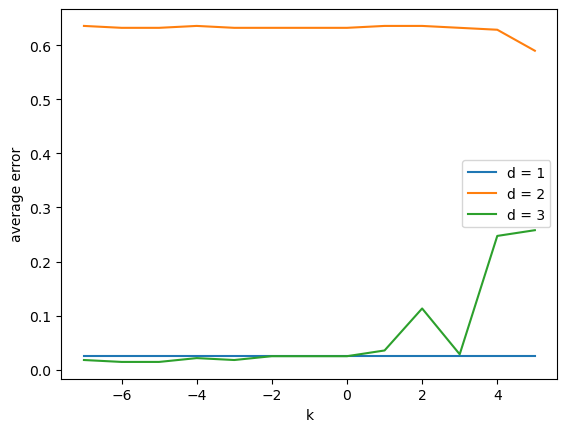

In [12]:
## WRITE YOUR CODE HERE ##
k_list = np.arange(-7,6)
for i, e in enumerate(error):
    plt.plot(k_list, e, label = f'd = {i + 1}')
plt.legend()
plt.xlabel('k')
plt.ylabel('average error')


B.1.3. *Determine the values of $d$ and $k$ for which the smallest average test error is obtained, and display such minimum error.*

In [ ]:
## WRITE YOUR CODE HERE ##
# d = 3, k = -5 or k = -6
# minimum error = 0.01766

B.1.4. *Use the 'sklearn' command **SVC** to compute the soft-SVM classifier with a polynomial kernel for the same $d$ that gave the minimum error in Exercise B.1.3. Compute the 0-1 average test error for this classifier, and compare to what you obtained in Exercise B.1.3; is it better or worse?*

In [11]:
## WRITE YOUR CODE HERE ##

d_list = np.arange(1,4)

# Collect the training and test features and labels into numpy arrays.
X_train = train_data[:,1:]
y_train = train_data[:,0] - 3
X_val   = test_data[:,1:]
y_val   = test_data[:,0] - 3
error = []

for i in range(len(d_list)):
    d = d_list[i]
    print("Degree: " + str(d))
    model = SVC(kernel='poly',degree=d)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    # print(y_pred)
    error.append(np.mean(0.5 * np.abs(y_val - y_pred)))

print(error)


Degree: 1
Degree: 2
Degree: 3
[0.024734982332155476, 0.053003533568904596, 0.04240282685512368]


In [ ]:
## WRITE YOUR ANSWER TO THE QUESTION HERE ##
# Sklean got smaller average loss when degree = 1, which is 0.024735.
# While it got bigger loss when degree = 3

B.1.5 (**OPTIONAL**) *Suppose that we want to penalize 5 times more false positive errors than false negative errors. Use your answer to Preparatory Exercise A.2.1 to modify your code, and run it with the previously optimal values of $d$ and $k$. Determine the ratio of false positive to false negative errors for the initial and final approaches. Comment on the results.*

In [45]:
## WRITE YOUR CODE HERE ##

def soft_SVM_p(G, y, lam, eta, T, n = 5):
    # G:   Gramian matrix
    # y:   vector of labels
    # lam: regularization parameter
    # eta: step size
    # T:   total number of iterations
    
    m     = y.size## FILL IN ##   # Number of samples
    alpha = np.zeros((m, T))## FILL IN ##   # Initialize matrix of values of alpha
    # alpha[:, 0] = np.random.rand(m)
    for t in range(T-1):
        # Choose a sample i at random
        ## FILL IN ##
        random_ind = np.random.choice(m)
        yi = y[random_ind]
        # Gi = G[random_ind, :]
        # Compute sub-gradient 'v'
        ## FILL IN ##
        v = 0
        tmp = alpha[:, t].T @ G
        if 1 - yi * tmp[random_ind] > 1:
            v = 2 * lam * G @ alpha[:, t]
        else:
            if yi == -1:
                v = 2 * lam * G @ alpha[:, t] - n * yi * G[:, random_ind]
            else:
                v = 2 * lam * G @ alpha[:, t] - yi * G[:, random_ind]
        # Update alpha
        alpha[:,t+1] = alpha[:, t] - eta * v## FILL IN ##

    # Return average alpha
    return np.mean(alpha, axis = 1)## FILL IN ##

G = np.power(X_train @ X_train.T + 1, 3)
alpha_p = soft_SVM_p(G, y_train, 1 / 2**np.abs(-2), 1e-8, 400)## FILL IN CODE ##
g = np.power(X_train @ X_val.T + 1, 3)
y_pred_p     = np.sign(alpha_p @ g)## FILL IN CODE ##

alpha = soft_SVM(G, y_train, 1 / 2**np.abs(-2), 1e-8, 400)## FILL IN CODE ##
g = np.power(X_train @ X_val.T + 1, 3)
y_pred     = np.sign(alpha @ g)## FILL IN CODE ##

from sklearn.metrics import confusion_matrix
conf_m = confusion_matrix(y_val, y_pred)
conf_m_p = confusion_matrix(y_val, y_pred_p)
fp = conf_m[0, 1] / (conf_m[0, 1]+conf_m[0, 0])
fn = conf_m[1, 0] / (conf_m[1, 0]+conf_m[1, 1])
fp_p = conf_m_p[0, 1] / (conf_m_p[0, 1]+conf_m_p[0, 0])
fn_p = conf_m_p[1, 0] / (conf_m_p[1, 0]+conf_m_p[1, 1])
print('initial approach: ')
print(f'false positive radio: {fp}')
print(f'false negative radio: {fn}')
print('------------')
print('final approach: ')
print(f'false positive radio: {fp_p}')
print(f'false negative radio: {fn_p}')


initial approach: 
false positive radio: 0.01764705882352941
false negative radio: 0.017699115044247787
------------
final approach: 
false positive radio: 0.023529411764705882
false negative radio: 0.02654867256637168


In [ ]:
## WRITE YOUR COMMENT ON THE RESULTS HERE ##
# the ratio of fp in final approach is smaller than the initial one, while radio of fn do not change.

## B.2. Spectral Clustering


In this task, you will implement spectral clustering on toy datasets. The task is divided into three parts:
- Investigate the dataset. Explain why K-Means clustering fail on these datasets,
- In Topic 10, you have studied three methods to assign weights in similarity matrix. You will design these three methods,
- Finally, you will apply each of these methods to implement spectral clustering and to get satisfactory results, you will tune hyperparameters that define the aforementioned methods. 
  

B.2.1. *Load the datasets* "toy_dataset_1.npy", toy_dataset_2.npy". *Explain why K-Means clustering fail on these datasets.*

*Loading the datasets*

In [14]:
""" Do not change anything here """
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eigh
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
%matplotlib inline 

X1 = np.load('./data/toy_dataset_1.npy')
X2 = np.load('./data/toy_dataset_2.npy')

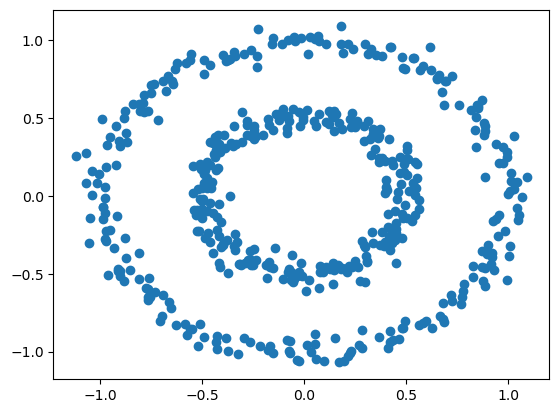

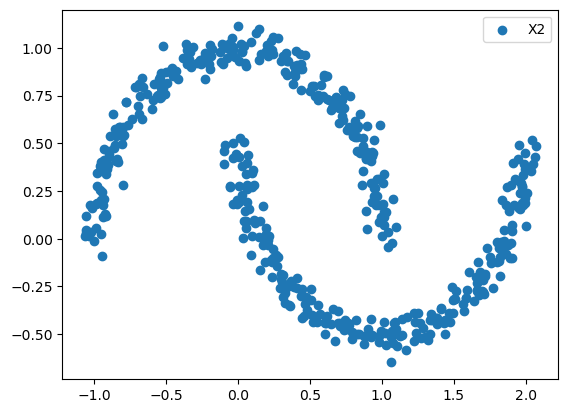

In [15]:
## Graded ##
'Fill your code here to visualize the data X1 and X2. Guess the number of clusters (K).'
plt.scatter(X1[:,0], X1[:,1], label = 'X1')
plt.figure()
plt.scatter(X2[:,0], X2[:,1], label = 'X2')
plt.legend()

*Implement K-Means using scikit-learn library on X1, X2. 
Use the guessed value of K to see the problem of using K-means to cluster these datasets. K corresponds to number of clusters*.

For more help, please refer: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html.

d:\Programs\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Programs\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


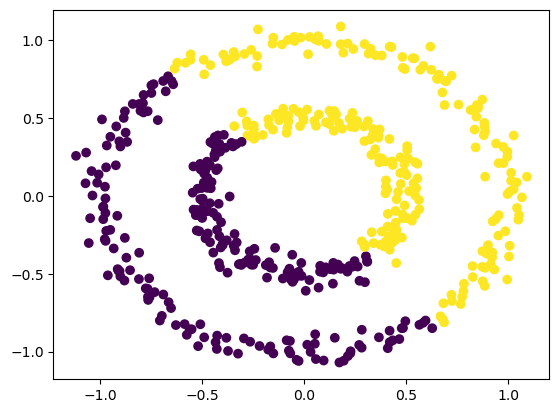

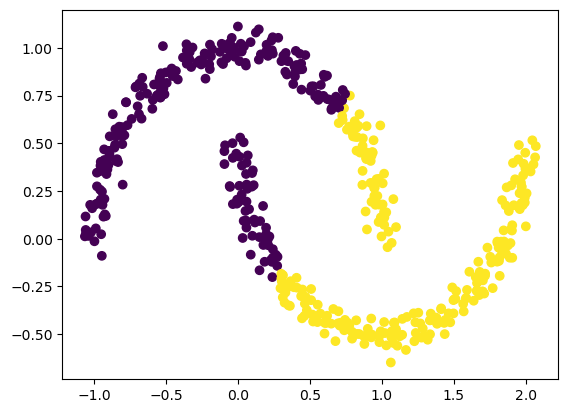

In [16]:
## Graded ##

'Fill your code here to implement K-Means on X1 and X2 using the sciKit-learn library'
model1 = KMeans(2, random_state=0, n_init='auto')
model2 = KMeans(2, random_state=0, n_init='auto')

label1 = model1.fit_predict(X1)
label2 = model2.fit_predict(X2)

plt.scatter(X1[:,0], X1[:,1], c=label1)
plt.figure()
plt.scatter(X2[:,0], X2[:,1], c=label2)


B.2.2. *Now, you will implement spectral clustering on X1, X2 and see the advantage of it over K-Means. For this purpose, you will try different choices of similarity matrix and tune the corresponding hyperparameters until you obtain satisfactory clustering of X1, X2*.

*In Lecture 9 (please refer slide 23 for the exact expressions), you have studied three choices of designing similarity matrices. They are*:
 - Gaussian kernel
   - $\sigma$ is the hyperparameter here. 
 - k-nearest neighbour similarity
   - $k$ is the hyperparameter. 
 - Self tuning kernel
   - $m$ is the hyperparameter.

In the following task, you will choose Gaussian kernel and k-nearest neighbour similarity and tune their hyperparameters ($\sigma$ and $k$). 
 

##### Note: You need to keep tuning hyperparameters to obtain satisfactory clustering.


*B.2.2.1. The functions "compute_Gaussian_kernel" and "compute_k_similarity" implement Gaussian kernel and k-nearest neighbour similarity respectively. The value returned by these functions is the similarity matrix (a.k.a. weight matrix) W. Fill the code and return W. The inputs to "compute_Gaussian_kernel" are the data (X1 or X2) and sigma ($\sigma$) and inputs to "compute_k_similarity" are the data (X1 or X2) and k ($k$)*. 

In [17]:
def compute_Gaussian_kernel(data,sigma): 
    ## Graded ##
    'Fill your code here'
    n = data.shape[0]
    W = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            tmp = np.dot(data[i] - data[j], data[i] - data[j])
            W[i][j] =  np.exp(-(tmp / sigma))
            W[j][i] =  np.exp(-(tmp / sigma))
    return W

In [18]:
def is_in_top_k(arr, k, value):
    # Find the indices of the top K minimum values
    top_indices = np.argpartition(arr, k)[:k]

    # Check if a specific value is among the top K minimum values
    is_in_top_K = value in arr[top_indices]
    return is_in_top_K

def compute_k_similarity(data,k):
    ## Graded ##

    'Fill your code here'
    n = data.shape[0]
    W = np.zeros((n, n), int)
    for i in range(n):
        # print(i)
        dist_i = np.zeros(n)
        for j in range(n):
            dist_i[j] = np.dot(data[i] - data[j], data[i] - data[j])

        for j in range(n):
            distance = dist_i[j]
            if is_in_top_k(dist_i, k, distance):
                W[i][j] = 1
    # print(W)
    # b = np.fill_diagonal(W, 1.0)
    return W

*B.2.2.2. Construct Laplace matrix (the matirx $L$ in slide 23 of lecture 9) by completing the definition of the function "compute_normalized_Laplacian" below. Inputs to this function are the data (X1 or X2), sigma ($\sigma$) and k ($k$). You will have to make use of functions "compute_Gaussian_kernel" and "compute_k_similarity" to get weight matrices as W_Gauss, W_k respectively. The values returned by this function are the Laplace matrices L_Gauss,L_k corresponding to W_Gauss, W_k respectively.*


In [19]:
def compute_normalized_Laplacian(data,sigma,k):
    ## Graded ##

    'Fill your code here'
    w_Gauss = compute_Gaussian_kernel(data, sigma)
    w_k = compute_k_similarity(data, k)
    dv1 = np.sum(w_Gauss, axis = 1)
    dv1 = np.power(dv1, -0.5)
    dv2 = np.sum(w_k, axis = 1)
    dv2 = np.power(dv2, -0.5)
    D1 = np.diag(dv1)
    
    D2 = np.diag(dv2)
    L_Gauss = D1 @ w_Gauss @ D1
    L_k = D2 @ w_k @ D2
    return L_Gauss, L_k

Top K eignevectors are computed using scipy built-in function eigh(). Matrix E can be directly constructed from the output of eigh().

Compute top K eigenvectors by using scipy built-in function "eigh(L)". You can directly construct matrix E from the output of eigh(). For more help, look at the definition of eigh() here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigh.html.

In [20]:
K = 2 # K specifies the number of clusters that
                            # you want to obtain on the data (X1 or X2). Make use of visualization of X1 and X2.
    
sigma1 = 0.001 # 'tune the value of sigma for Gaussian kernel corresponding to X1 here'
k1 = 17 # 'tune the value of k for k-nearest neighbour similarity corresponding to X1 here  '

sigma2 = 0.08# 'tune the value of sigma for Gaussian kernel corresponding to X2 here'
k2 = 25 # 'tune the value of k for k-nearest neighbour similarity corresponding to X2 here'


"""" Fill your code below to compute the Laplacian matrix (L) for X1 and X2 using compute_normalized_Laplacian.
For both X1 and X2, you will get two Laplacian matrices that correspond to using Gaussian kernel and k-nearest neighbour similarity. 
For each of these Laplace matrices, compute corresponding top K eigenvectors. 

Use eigh() function to compute eigenvectors
(eigh() function returns a matrix whose columns are eigenvectors arranged in the increasing order of their corresponding 
eigenvalues. So to choose top K eigenvectors, you need to select last K columns of the matrix returned by eigh()). """

L_gauss1, L_k1 = compute_normalized_Laplacian(X1, sigma1, k1)
# print(L_gauss1, L_k1)
L_gauss2, L_k2 = compute_normalized_Laplacian(X2, sigma2, k2)
# print(L_gauss2, L_k2)



In [26]:
E_gauss1 = eigh(L_gauss1)[:, -K:]
E_k1 = eigh(L_k1)[1][:, -K:]
E_gauss2 = eigh(L_gauss2)[1][:, -K:]
E_k2 = eigh(L_k2)[1][:, -K:]
#print(E_k2.shape)
# print(eigh(L_gauss1)[0].shape)
print(E_gauss1.shape)
# print(eigh(L_gauss1)[1].shape)

TypeError: tuple indices must be integers or slices, not tuple

*B.2.2.3. Now, normalize the matrix E using the scikit-learn library "normalize". For each choice of similarity, you will get one such matrix E. So, for each X1, X2, you will obtain two such matrices*.

For more help on using normalize function, please refer: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html.

In [114]:
'Fill your code here'
E_gauss1 = normalize(E_gauss1)
E_k1 = normalize(E_k1)
E_gauss2 = normalize(E_gauss2)
E_k2 = normalize(E_k2)

*B.2.2.4. Now, apply K-Means algorithm on the above normalized matrices to obtain labels, which you will use to cluster datapoints in matrices X1, X2. Use scikit-learn library to do K-Means clustering. Store them as*:
 - y1_pred_Gauss, y1_pred_k that correspond to labels on the data X1 obtained using Gaussian kernel and k-nearest neighbour similarity respectively,
 - y2_pred_Gauss, y2_pred_k that correspond to labels on the data X2 obtained using Gaussian kernel and k-nearest neighbour similarity respectively.

In [115]:
'Fill your code here'
model1_g = KMeans(K, random_state=0, n_init='auto')
model1_k = KMeans(K, random_state=0, n_init='auto')
model2_g = KMeans(K, random_state=0, n_init='auto')
model2_k = KMeans(K, random_state=0, n_init='auto')

y1_pred_Gauss = model1_g.fit_predict(E_gauss1)
y1_pred_k = model1_k.fit_predict(E_k1)
y2_pred_Gauss = model2_g.fit_predict(E_gauss2)
y2_pred_k = model2_k.fit_predict(E_k2)

d:\Programs\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Programs\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Programs\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Programs\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

Plot the clustered data points below.

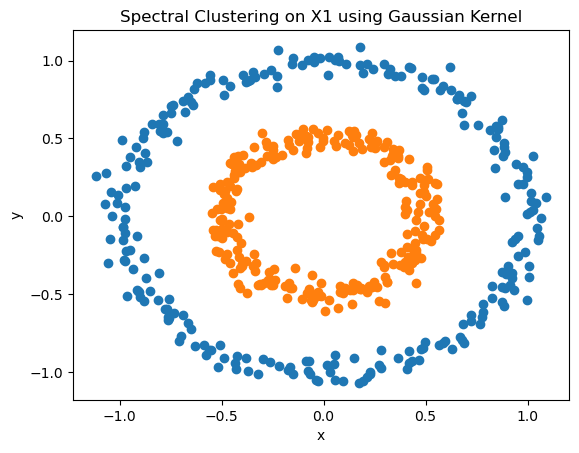

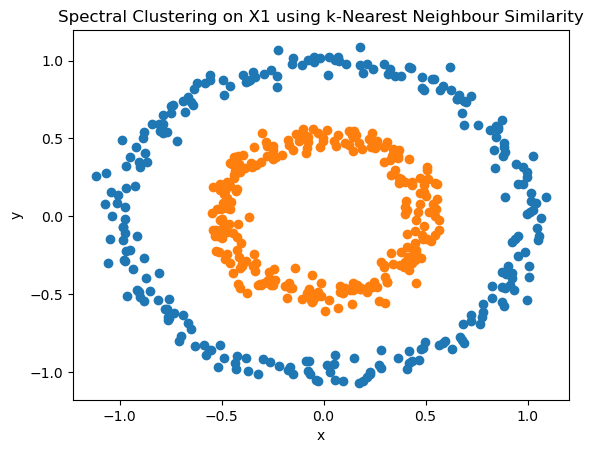

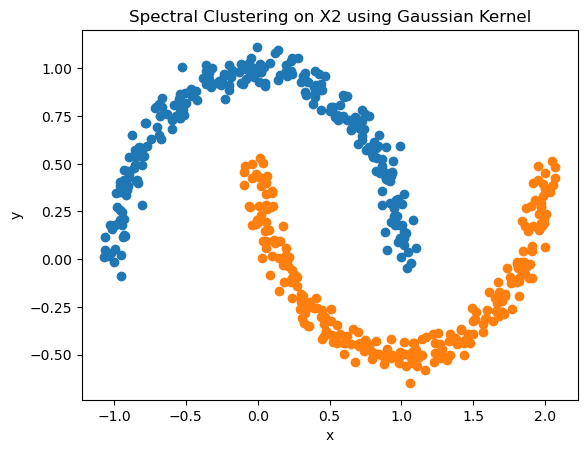

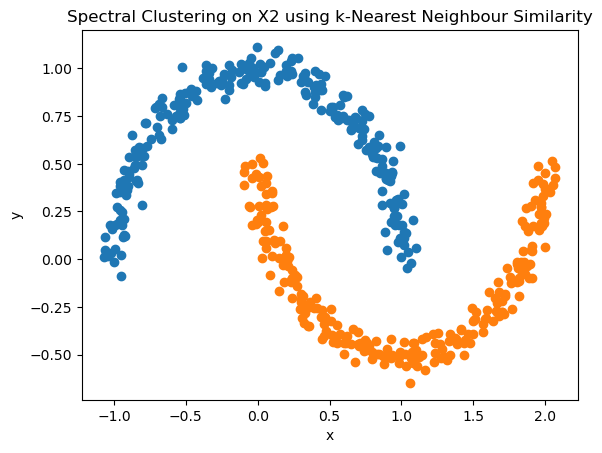

In [116]:
""" Do not change anything here """

plt.scatter(X1[:,0][y1_pred_Gauss==0],X1[:,1][y1_pred_Gauss==0],label='class 1')
plt.scatter(X1[:,0][y1_pred_Gauss==1],X1[:,1][y1_pred_Gauss==1], label = 'class 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Spectral Clustering on X1 using Gaussian Kernel')
plt.show()

plt.scatter(X1[:,0][y1_pred_k==0],X1[:,1][y1_pred_k==0],label='class 1')
plt.scatter(X1[:,0][y1_pred_k==1],X1[:,1][y1_pred_k==1], label = 'class 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Spectral Clustering on X1 using k-Nearest Neighbour Similarity')
plt.show()

plt.scatter(X2[:,0][y2_pred_Gauss==0],X2[:,1][y2_pred_Gauss==0],label='class 1')
plt.scatter(X2[:,0][y2_pred_Gauss==1],X2[:,1][y2_pred_Gauss==1], label = 'class 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Spectral Clustering on X2 using Gaussian Kernel')
plt.show()

plt.scatter(X2[:,0][y2_pred_k==0],X2[:,1][y2_pred_k==0],label='class 1')
plt.scatter(X2[:,0][y2_pred_k==1],X2[:,1][y2_pred_k==1], label = 'class 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Spectral Clustering on X2 using k-Nearest Neighbour Similarity')
plt.show()

Question (graded):


- What is the choice of $\sigma$ and $k$ that yielded a statisfactory clustering in the case of Gaussian kernel and k-similarity respectively? Comment on these values and interpret the results. 

In [ ]:
## ENTER YOUR ANSWER HERE ##
# sigma1 = 0.001 k1 = 17
# sigma2 = 0.08  k2 = 25 


The parameter σ controls the scale of this similarity measure. A smaller value of σ leads to a sharper, more localized Gaussian distribution, whereas a larger value of σ leads to a smoother, more spread-out distribution. In spectral clustering, σ influences how sensitive the similarity measure is to the distance between points. A smaller σ may lead to a more localized similarity measure, focusing on very close neighbors, while a larger σ considers a broader neighborhood.

A higher value of k includes more neighbors in the similarity computation, potentially capturing more global structure in the data, while a lower value of k captures more local structure.